In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [37]:
df = pd.read_csv("caravan.csv")

In [8]:
df.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [9]:
df.columns

Index(['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg Age',
       'Customer main type', 'Roman catholic', 'Protestant', 'Other religion',
       'No religion', 'Married', 'Living together', 'Other relation',
       'Singles', 'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle Management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution third party insurance (firms

In [11]:
data['CARAVAN POLICY'].unique()

array([0, 1])

In [125]:
X = df.drop(columns=['CARAVAN POLICY'])  # Features
y = df['CARAVAN POLICY']  # Target variable

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
classifiers = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Bagging_RandomForest', BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)),
]

param_grids = {
    'RandomForest': {
        'feature_selection__k': range(5 ,85,5),  # Specify the k range for RandomForest
        'classification__n_estimators': [50, 100, 200], 
        'classification__max_depth': [None, 10, 20]  
    },
    'GradientBoosting': {
        'feature_selection__k': range(5 ,85,5),  # Specify the k range for GradientBoosting
        'classification__n_estimators': [50, 100, 200],  
        'classification__learning_rate': [0.01, 0.1]  
    },
    'Bagging_RandomForest': {
        'feature_selection__k': range(5 ,85,5),  # Specify the k range for Bagging with RandomForest base estimator
        'classification__n_estimators': [50, 100, 200],  
    }
}


In [122]:
# Create an empty dictionary to store the best model and its parameters
best_model = None
best_params = None
best_score = 0  # Initialize with a low value

# Iterate through the classifiers and perform grid search
for classifier_name, classifier in classifiers:
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classification', classifier)
    ])
    
    param_grid = param_grids[classifier_name]
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=3)
    grid_search.fit(X, y)
    
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

# Print the best model and its parameters
print("Best Model:", best_model)
print("Best Model Parameters:", best_params)
print("Best Model Score:", best_score)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=5;, score=0.026 total time=   0.2s
[CV 2/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=5;, score=0.026 total time=   0.1s
[CV 3/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=5;, score=0.103 total time=   0.1s
[CV 4/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=5;, score=0.052 total time=   0.1s
[CV 5/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=5;, score=0.077 total time=   0.1s
[CV 1/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=10;, score=0.171 total time=   0.2s
[CV 2/5] END classification__max_depth=None, classification__n_estimators=50, feature_selection__k=10;, score=0.085 total time=   0.

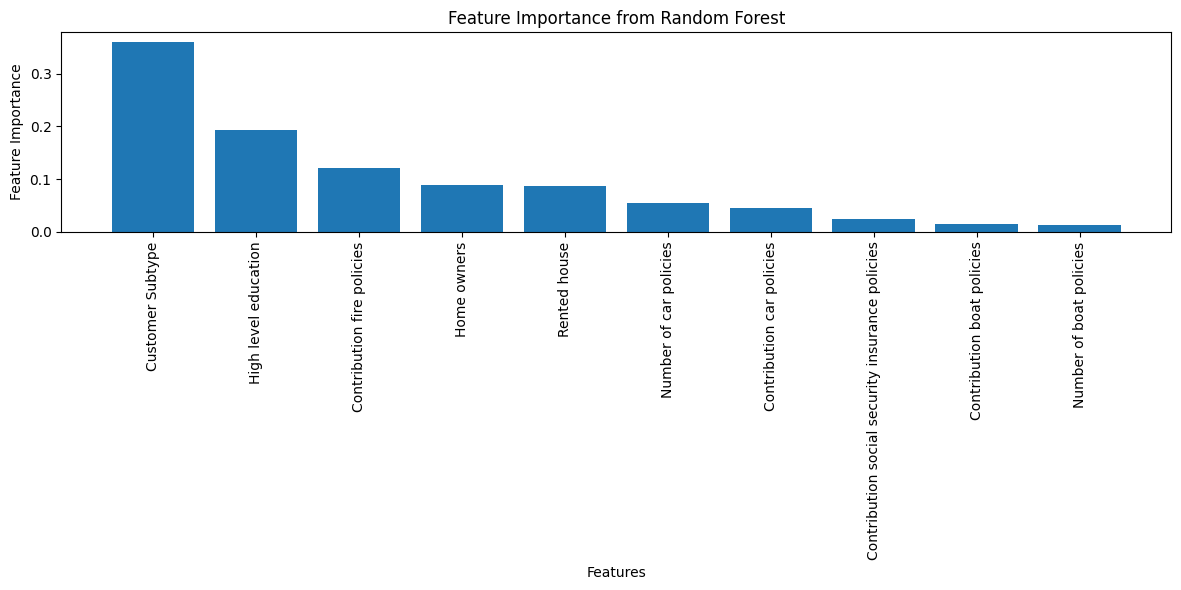

In [123]:
# Extract feature importances from the Random Forest model
feature_importances = best_model.named_steps['classification'].feature_importances_

# Get the names of the selected features
selected_feature_names = X.columns[best_model.named_steps['feature_selection'].get_support()]

# Sort feature importances in descending order 
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = selected_feature_names[sorted_indices]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


In [83]:
def get_performance(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.2f}")
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.2f}")
    
    # Calculate F1-score
    f1 = f1_score(y_taest, y_pred)
    print(f"F1-score: {f1:.2f}")
    
    # Calculate ROC-AUC score 
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC: {roc_auc:.2f}")
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)


In [128]:
test_data = pd.read_csv("caravanTest.csv")

In [129]:
test_data.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


In [134]:
len(test_data)

4000

In [135]:
X_test = test_data.drop(columns=['CARAVAN POLICY'])  # Features
y_test = test_data['CARAVAN POLICY']  # Target variable

In [139]:
# Predict probabilities for the positive class (class=1)
probabilities = best_model.predict_proba(X_test)[:, 1]

# Create a DataFrame with probabilities
customer_probabilities = pd.DataFrame({'Probability': probabilities})

# Sort customers by probability in descending order
customer_probabilities = customer_probabilities.sort_values(by='Probability', ascending=False)

# Select the top 800 customers based on their position in the sorted list
selected_customers = X_test.iloc[customer_probabilities.index[:800]]

selected_customers.reset_index(drop=True, inplace=True)
selected_customers.to_csv('selected_customers.csv', index=False)
